### Data augmentation

In [26]:
import os
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import load_model,Model,Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from keras.applications.resnet_v2 import ResNet50V2

## Dataset

In [2]:
x = open('Documents/X.pickle','rb')
x_train = pickle.load(x)
data = np.array(x_train).reshape(-1,224,224,3)


In [4]:
y = open('Documents/Y.pickle','rb')
y_label = pickle.load(y)
label = np.array(y_label).reshape(-1,1)

In [7]:
train_x,test_x,train_y,test_y = train_test_split(data,label,test_size=0.2,random_state=10)

In [8]:
train_x,test_x = (train_x.astype('float32'))/255.0,(test_x.astype('float32'))/255.0

In [12]:
train_y,test_y = to_categorical(train_y,21),to_categorical(test_y,21)

## Model 

In [27]:
def model_resnet_50():
  model = ResNet50V2(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
  for layer in model.layers:
    layer.trainable=False

  x = model.output
  x = Dense(1024, activation = "relu")(x)
  x = Dense(128, activation = "relu")(x)
  pred = Dense(21, activation = "softmax")(x)
  net = Model(inputs=model.input, outputs = pred)
  net.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
  return net

In [28]:
model = model_resnet_50()

In [30]:
hist =model.fit(train_x,train_y,epochs=100,verbose=1,validation_split=0.2,batch_size=128)

Train on 1344 samples, validate on 336 samples
Epoch 1/100
1344/1344 [==============================] - 856s 637ms/step - loss: 1.5339 - accuracy: 0.5878 - val_loss: 1.2259 - val_accuracy: 0.6488
Epoch 2/100
1344/1344 [==============================] - 736s 548ms/step - loss: 0.2192 - accuracy: 0.9249 - val_loss: 1.1602 - val_accuracy: 0.7202
Epoch 3/100
1344/1344 [==============================] - 785s 584ms/step - loss: 0.0901 - accuracy: 0.9688 - val_loss: 1.1018 - val_accuracy: 0.7113
Epoch 4/100
1344/1344 [==============================] - 769s 572ms/step - loss: 0.0606 - accuracy: 0.9851 - val_loss: 1.1098 - val_accuracy: 0.7381
Epoch 5/100
1344/1344 [==============================] - 781s 581ms/step - loss: 0.0231 - accuracy: 0.9940 - val_loss: 1.1939 - val_accuracy: 0.7113
Epoch 6/100
1344/1344 [==============================] - 756s 563ms/step - loss: 0.0084 - accuracy: 0.9993 - val_loss: 1.0985 - val_accuracy: 0.7411
Epoch 7/100
1344/1344 [==============================] - 72

1344/1344 [==============================] - 745s 554ms/step - loss: 9.7577e-04 - accuracy: 0.9993 - val_loss: 1.1624 - val_accuracy: 0.7768
Epoch 56/100
1344/1344 [==============================] - 746s 555ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.0836 - val_accuracy: 0.7887
Epoch 57/100
1344/1344 [==============================] - 736s 548ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 1.1073 - val_accuracy: 0.7946
Epoch 58/100
1344/1344 [==============================] - 743s 553ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 1.1445 - val_accuracy: 0.7887
Epoch 59/100
1344/1344 [==============================] - 742s 552ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 1.2753 - val_accuracy: 0.7708
Epoch 60/100
1344/1344 [==============================] - 748s 557ms/step - loss: 0.0088 - accuracy: 0.9993 - val_loss: 1.1752 - val_accuracy: 0.7738
Epoch 61/100
1344/1344 [==============================] - 739s 550ms/step - loss: 0.0105 - accuracy: 0.9963 -

In [32]:
loss,acc = model.evaluate(test_x,test_y,verbose=1)
print(' ResNet_50 on testing set:  Loss : {:.2f} & Accuracy : {:.2f}%'.format(loss,acc*100))

420/420 [==============================] - 196s 467ms/step
 ResNet_50 on testing set:  Loss : 1.12 & Accuracy : 80.48%


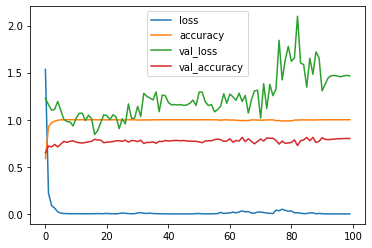

In [33]:
for i in ['loss','accuracy','val_loss','val_accuracy']:
  plt.plot(hist.history[i],label=i)
  plt.legend()
plt.show()

In [35]:
model.save('model_image_pfe.h5')